In [2]:
# import the package
import numpy as np
import matplotlib.pyplot as plt
import control as ct
from control.matlab import *

In [ ]:
"""
This code shows the plane's response to longitudinal movement of a
aircraft when it is disturbed by external forces
Wind, changes in atmospheric conditions or pilots commands.

References
M. V. Cook, Flight Dynamics Principles: A Linear Systems Approach to
Aircraft Stability and Control.
"""

In [5]:
# Open Loop
s = tf('s')
# long period
H_long = 1/(s**2 + 0.017*s + 0.002)
pole(H_long)

In [10]:
damp(H_long)

_____Eigenvalue______ Damping___ Frequency_
   -0.0085  +0.04391j     0.1901    0.04472
   -0.0085  -0.04391j     0.1901    0.04472


(array([0.04472136, 0.04472136]),
 array([0.19006578, 0.19006578]),
 array([-0.0085+0.04390615j, -0.0085-0.04390615j]))

In [11]:
# Short period
H_short = 1/(s**2 + 1.74*s + 29.49)
pole(H_short)

array([-0.87+5.36032648j, -0.87-5.36032648j])

In [ ]:
damp(H_short)

In [13]:
# TF from the rest of the aircraft 
G1 = -20.6*(s + 0.013)*(s + 0.62)
# TF from pitch for disturbance in elevator
aircraft = G1 * H_long * H_short

Text(0.5, 0, 'Time $t$ [s]')

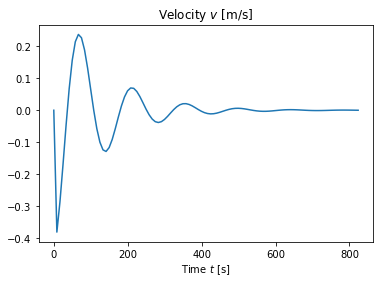

In [24]:
t, y1 = impulse(aircraft)
plt.plot(y1,t)
plt.title('Longitudinal moviment in elevator')

Text(0.5, 1.0, 'Phugoid moviment due an disturbance in elevator')

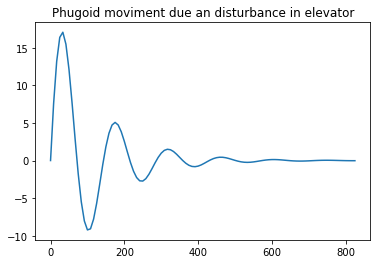

In [25]:
t, y2 = impulse(H_long)
plt.plot(y2,t)
plt.title('Phugoid moviment due an disturbance in elevator')

Text(0.5, 1.0, 'Short moviment due an disturbance in elevator')

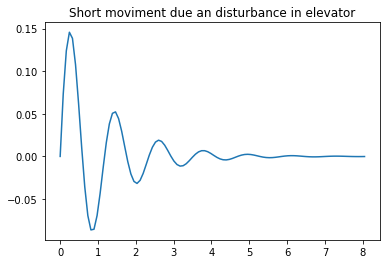

In [26]:
t, y3 = impulse(H_short)
plt.plot(y3,t)
plt.title('Short moviment due an disturbance in elevator')

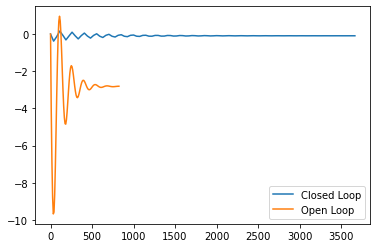

In [33]:
# Closed Loop
K = 0.03;
airplane_long_Closed_Loop = feedback(K*aircraft,1)

t, y_closed = step(airplane_long_Closed_Loop)
plt.plot(y_closed,t)
t, y_open = step(aircraft)
plt.plot(y_open,t)
plt.legend(['Closed Loop','Open Loop'])